## Import Modules

In [1]:
from fbprophet import Prophet
import pandas as pd

Importing plotly failed. Interactive plots will not work.


## Initiate Model

In [2]:
# model = Prophet(growth = 'logistic')

## Read Data

In [21]:
df = pd.read_csv('Combined_Data_for_model_final_2.csv')

In [23]:
df[df['Date'] == '2018-01-01 00:00:00']

,Unnamed: 0,Date,Haryana Load (MW),temp,dew,humidity,windspeed,winddir,cloudcover,visibility
70175,70175,2018-01-01 00:00:00,3880.22,11.0,9.0,87.48,0.0,0.0,0.0,1.0


In [24]:
df = df.iloc[70175:]

In [26]:
df

,Unnamed: 0,Date,Haryana Load (MW),temp,dew,humidity,windspeed,winddir,cloudcover,visibility
70175,70175,2018-01-01 00:00:00,3880.22,11.0,9.0,87.48,0.0,0.0,0.0,1.0
70176,70176,2018-01-01 00:15:00,3778.15,11.0,9.0,87.48,0.0,0.0,0.0,1.0
70177,70177,2018-01-01 00:30:00,3742.81,11.0,9.0,87.48,0.0,0.0,0.0,1.0
70178,70178,2018-01-01 00:45:00,3627.39,11.0,9.0,87.48,0.0,0.0,0.0,1.0
70179,70179,2018-01-01 01:00:00,3616.50,10.0,8.0,87.38,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
210426,210426,2021-12-31 22:45:00,4712.55,10.0,8.0,87.38,0.0,0.0,27.4,2.0
210427,210427,2021-12-31 23:00:00,4649.58,9.2,7.3,88.04,0.0,0.0,28.5,1.3
210428,210428,2021-12-31 23:15:00,4571.39,9.2,7.3,88.04,0.0,0.0,28.5,1.3
210429,210429,2021-12-31 23:30:00,4510.39,9.2,7.3,88.04,0.0,0.0,28.5,1.3


In [27]:
df['Date'] = pd.to_datetime(df['Date'])

In [28]:
df

,Unnamed: 0,Date,Haryana Load (MW),temp,dew,humidity,windspeed,winddir,cloudcover,visibility
70175,70175,2018-01-01 00:00:00,3880.22,11.0,9.0,87.48,0.0,0.0,0.0,1.0
70176,70176,2018-01-01 00:15:00,3778.15,11.0,9.0,87.48,0.0,0.0,0.0,1.0
70177,70177,2018-01-01 00:30:00,3742.81,11.0,9.0,87.48,0.0,0.0,0.0,1.0
70178,70178,2018-01-01 00:45:00,3627.39,11.0,9.0,87.48,0.0,0.0,0.0,1.0
70179,70179,2018-01-01 01:00:00,3616.50,10.0,8.0,87.38,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
210426,210426,2021-12-31 22:45:00,4712.55,10.0,8.0,87.38,0.0,0.0,27.4,2.0
210427,210427,2021-12-31 23:00:00,4649.58,9.2,7.3,88.04,0.0,0.0,28.5,1.3
210428,210428,2021-12-31 23:15:00,4571.39,9.2,7.3,88.04,0.0,0.0,28.5,1.3
210429,210429,2021-12-31 23:30:00,4510.39,9.2,7.3,88.04,0.0,0.0,28.5,1.3


## Multivariate Forecasting

In [29]:
dfmv = df[['Date', 'Haryana Load (MW)', 'temp', 'dew', 'humidity', 'cloudcover', 'windspeed', 'winddir', 'visibility']]

In [30]:
dfmv

,Date,Haryana Load (MW),temp,dew,humidity,cloudcover,windspeed,winddir,visibility
70175,2018-01-01 00:00:00,3880.22,11.0,9.0,87.48,0.0,0.0,0.0,1.0
70176,2018-01-01 00:15:00,3778.15,11.0,9.0,87.48,0.0,0.0,0.0,1.0
70177,2018-01-01 00:30:00,3742.81,11.0,9.0,87.48,0.0,0.0,0.0,1.0
70178,2018-01-01 00:45:00,3627.39,11.0,9.0,87.48,0.0,0.0,0.0,1.0
70179,2018-01-01 01:00:00,3616.50,10.0,8.0,87.38,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
210426,2021-12-31 22:45:00,4712.55,10.0,8.0,87.38,27.4,0.0,0.0,2.0
210427,2021-12-31 23:00:00,4649.58,9.2,7.3,88.04,28.5,0.0,0.0,1.3
210428,2021-12-31 23:15:00,4571.39,9.2,7.3,88.04,28.5,0.0,0.0,1.3
210429,2021-12-31 23:30:00,4510.39,9.2,7.3,88.04,28.5,0.0,0.0,1.3


In [31]:
dfmv.head()

,Date,Haryana Load (MW),temp,dew,humidity,cloudcover,windspeed,winddir,visibility
70175,2018-01-01 00:00:00,3880.22,11.0,9.0,87.48,0.0,0.0,0.0,1.0
70176,2018-01-01 00:15:00,3778.15,11.0,9.0,87.48,0.0,0.0,0.0,1.0
70177,2018-01-01 00:30:00,3742.81,11.0,9.0,87.48,0.0,0.0,0.0,1.0
70178,2018-01-01 00:45:00,3627.39,11.0,9.0,87.48,0.0,0.0,0.0,1.0
70179,2018-01-01 01:00:00,3616.50,10.0,8.0,87.38,0.0,0.0,0.0,1.0


In [32]:
dfmv.tail()

,Date,Haryana Load (MW),temp,dew,humidity,cloudcover,windspeed,winddir,visibility
210426,2021-12-31 22:45:00,4712.55,10.0,8.0,87.38,27.4,0.0,0.0,2.0
210427,2021-12-31 23:00:00,4649.58,9.2,7.3,88.04,28.5,0.0,0.0,1.3
210428,2021-12-31 23:15:00,4571.39,9.2,7.3,88.04,28.5,0.0,0.0,1.3
210429,2021-12-31 23:30:00,4510.39,9.2,7.3,88.04,28.5,0.0,0.0,1.3
210430,2021-12-31 23:45:00,4449.94,9.2,7.3,88.04,28.5,0.0,0.0,1.3


In [33]:
dfmv = dfmv.rename(columns = {'Date':'ds', 'Haryana Load (MW)':'y'})

In [34]:
import holidays

In [35]:
# HR_holidays = holidays.country_holidays('IN', subdiv='HR')

In [36]:
# HR_holidays[2016]

In [37]:
mv_model = Prophet(growth='logistic')

In [38]:
mv_model.add_regressor('temp')
mv_model.add_regressor('dew')
mv_model.add_regressor('humidity')

mv_model.add_regressor('cloudcover')

mv_model.add_regressor('windspeed')
mv_model.add_regressor('winddir')
mv_model.add_regressor('visibility')

## Now add Train-Test Split

In [39]:
train_size = int(dfmv.shape[0]*0.7)

In [40]:
df_train = dfmv.iloc[:train_size]

In [41]:
# test_size = dfuv.shape[0] - train_size

In [42]:
df_test = dfmv[train_size:]

In [43]:
df_train['cap'] = 6000

C:\Users\HP\AppData\Local\Temp/ipykernel_8852/1207476209.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['cap'] = 6000


In [44]:
df_train

,ds,y,temp,dew,humidity,cloudcover,windspeed,winddir,visibility,cap
70175,2018-01-01 00:00:00,3880.22,11.0,9.0,87.48,0.0,0.0,0.0,1.0,6000
70176,2018-01-01 00:15:00,3778.15,11.0,9.0,87.48,0.0,0.0,0.0,1.0,6000
70177,2018-01-01 00:30:00,3742.81,11.0,9.0,87.48,0.0,0.0,0.0,1.0,6000
70178,2018-01-01 00:45:00,3627.39,11.0,9.0,87.48,0.0,0.0,0.0,1.0,6000
70179,2018-01-01 01:00:00,3616.50,10.0,8.0,87.38,0.0,0.0,0.0,1.0,6000
...,...,...,...,...,...,...,...,...,...,...
168349,2020-10-19 15:30:00,6730.30,33.0,10.0,24.40,0.0,16.6,310.0,4.0,6000
168350,2020-10-19 15:45:00,6720.85,33.0,10.0,24.40,0.0,16.6,310.0,4.0,6000
168351,2020-10-19 16:00:00,6738.86,32.0,10.0,25.82,0.0,14.8,300.0,4.0,6000
168352,2020-10-19 16:15:00,6756.65,32.0,10.0,25.82,0.0,14.8,300.0,4.0,6000


## Fit model on Train Dataset

In [45]:
mv_model.fit(df_train)

## Save model

In [46]:
from prophet.serialize import model_to_json, model_from_json

with open('Partial_mv_model.json', 'w') as fout:
    fout.write(model_to_json(mv_model))  # Save model

with open('Partial_mv_model.json', 'r') as fin:
    saved_mv_model = model_from_json(fin.read())  # Load model

ERROR:prophet.plot:Importing plotly failed. Interactive plots will not work.


In [47]:
# import pickle

In [48]:
# import joblib

In [49]:
# joblib.dump(mv_model, 'logistic_mv_all_model_good.pkl')

In [50]:
# saved_mv_model = joblib.load('logistic_mv_all_model_good.pkl')

In [51]:
df_test

,ds,y,temp,dew,humidity,cloudcover,windspeed,winddir,visibility
168354,2020-10-19 16:45:00,6699.14,32.0,10.0,25.82,0.0,14.8,300.0,4.0
168355,2020-10-19 17:00:00,6749.01,30.9,13.2,33.88,0.0,7.4,303.0,3.1
168356,2020-10-19 17:15:00,6409.50,30.9,13.2,33.88,0.0,7.4,303.0,3.1
168357,2020-10-19 17:30:00,6576.38,30.9,13.2,33.88,0.0,7.4,303.0,3.1
168358,2020-10-19 17:45:00,6282.79,30.9,13.2,33.88,0.0,7.4,303.0,3.1
...,...,...,...,...,...,...,...,...,...
210426,2021-12-31 22:45:00,4712.55,10.0,8.0,87.38,27.4,0.0,0.0,2.0
210427,2021-12-31 23:00:00,4649.58,9.2,7.3,88.04,28.5,0.0,0.0,1.3
210428,2021-12-31 23:15:00,4571.39,9.2,7.3,88.04,28.5,0.0,0.0,1.3
210429,2021-12-31 23:30:00,4510.39,9.2,7.3,88.04,28.5,0.0,0.0,1.3


In [52]:
df_test['cap'] = 6000

C:\Users\HP\AppData\Local\Temp/ipykernel_8852/3138556019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['cap'] = 6000


In [53]:
test_ds = df_test.drop(columns='y')

In [54]:
test_ds

,ds,temp,dew,humidity,cloudcover,windspeed,winddir,visibility,cap
168354,2020-10-19 16:45:00,32.0,10.0,25.82,0.0,14.8,300.0,4.0,6000
168355,2020-10-19 17:00:00,30.9,13.2,33.88,0.0,7.4,303.0,3.1,6000
168356,2020-10-19 17:15:00,30.9,13.2,33.88,0.0,7.4,303.0,3.1,6000
168357,2020-10-19 17:30:00,30.9,13.2,33.88,0.0,7.4,303.0,3.1,6000
168358,2020-10-19 17:45:00,30.9,13.2,33.88,0.0,7.4,303.0,3.1,6000
...,...,...,...,...,...,...,...,...,...
210426,2021-12-31 22:45:00,10.0,8.0,87.38,27.4,0.0,0.0,2.0,6000
210427,2021-12-31 23:00:00,9.2,7.3,88.04,28.5,0.0,0.0,1.3,6000
210428,2021-12-31 23:15:00,9.2,7.3,88.04,28.5,0.0,0.0,1.3,6000
210429,2021-12-31 23:30:00,9.2,7.3,88.04,28.5,0.0,0.0,1.3,6000


In [55]:
# test_ds = pd.DataFrame(df_test['ds'])

In [56]:
# test_ds

## Make Forecast on Test Dataset

In [57]:
forecast = saved_mv_model.predict(test_ds)

In [77]:
test_forecast = forecast

In [78]:
test_forecast.head()

,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,...,windspeed,windspeed_lower,windspeed_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-10-19 16:45:00,5999.771291,6000,4676.509686,6874.043964,5999.771291,5999.771291,-158.547658,-158.547658,-158.547658,...,-57.405638,-57.405638,-57.405638,-459.593351,-459.593351,-459.593351,0.0,0.0,0.0,5841.223633
1,2020-10-19 17:00:00,5999.771307,6000,4960.109750,7112.853230,5999.771307,5999.771307,52.103511,52.103511,52.103511,...,6.099678,6.099678,6.099678,-460.107132,-460.107132,-460.107132,0.0,0.0,0.0,6051.874818
2,2020-10-19 17:15:00,5999.771323,6000,5088.186353,7342.546201,5999.771323,5999.771323,124.800046,124.800046,124.800046,...,6.099678,6.099678,6.099678,-460.621321,-460.621321,-460.621321,0.0,0.0,0.0,6124.571370
3,2020-10-19 17:30:00,5999.771339,6000,5080.446578,7266.870547,5999.771339,5999.771339,207.924824,207.924824,207.924824,...,6.099678,6.099678,6.099678,-461.135918,-461.135918,-461.135918,0.0,0.0,0.0,6207.696163
4,2020-10-19 17:45:00,5999.771355,6000,5235.586343,7444.618638,5999.771355,5999.771355,299.201044,299.201044,299.201044,...,6.099678,6.099678,6.099678,-461.650923,-461.650923,-461.650923,0.0,0.0,0.0,6298.972399


In [79]:
test_forecast.tail()

,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,...,windspeed,windspeed_lower,windspeed_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
42072,2021-12-31 22:45:00,5999.988095,6000,4190.394370,6288.676150,5999.987420,5999.988692,-721.907446,-721.907446,-721.907446,...,69.604994,69.604994,69.604994,341.414146,341.414146,341.414146,0.0,0.0,0.0,5278.080649
42073,2021-12-31 23:00:00,5999.988096,6000,4274.034652,6420.708158,5999.987421,5999.988692,-710.298518,-710.298518,-710.298518,...,69.604994,69.604994,69.604994,341.331212,341.331212,341.331212,0.0,0.0,0.0,5289.689578
42074,2021-12-31 23:15:00,5999.988096,6000,4191.221217,6354.986880,5999.987421,5999.988693,-741.040682,-741.040682,-741.040682,...,69.604994,69.604994,69.604994,341.247533,341.247533,341.247533,0.0,0.0,0.0,5258.947415
42075,2021-12-31 23:30:00,5999.988097,6000,4113.625633,6320.412195,5999.987422,5999.988694,-768.254245,-768.254245,-768.254245,...,69.604994,69.604994,69.604994,341.163108,341.163108,341.163108,0.0,0.0,0.0,5231.733852
42076,2021-12-31 23:45:00,5999.988098,6000,4118.493113,6253.826359,5999.987423,5999.988695,-791.531128,-791.531128,-791.531128,...,69.604994,69.604994,69.604994,341.077938,341.077938,341.077938,0.0,0.0,0.0,5208.456970


In [80]:
test_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-10-19 16:45:00,5841.223633,4676.509686,6874.043964
1,2020-10-19 17:00:00,6051.874818,4960.109750,7112.853230
2,2020-10-19 17:15:00,6124.571370,5088.186353,7342.546201
3,2020-10-19 17:30:00,6207.696163,5080.446578,7266.870547
4,2020-10-19 17:45:00,6298.972399,5235.586343,7444.618638
...,...,...,...,...
42072,2021-12-31 22:45:00,5278.080649,4190.394370,6288.676150
42073,2021-12-31 23:00:00,5289.689578,4274.034652,6420.708158
42074,2021-12-31 23:15:00,5258.947415,4191.221217,6354.986880
42075,2021-12-31 23:30:00,5231.733852,4113.625633,6320.412195


## Plot test forecast with actual values

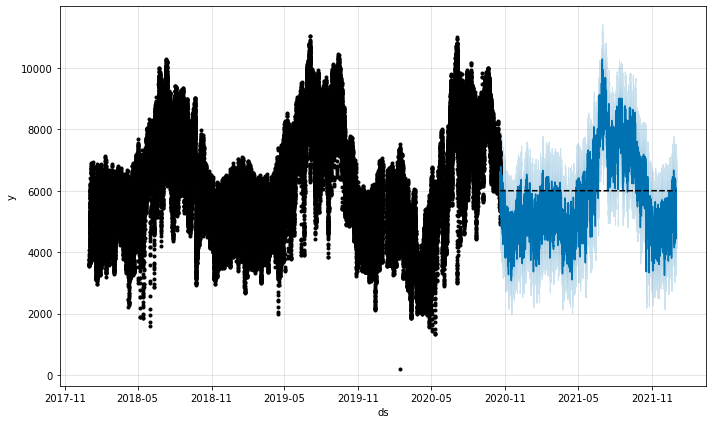

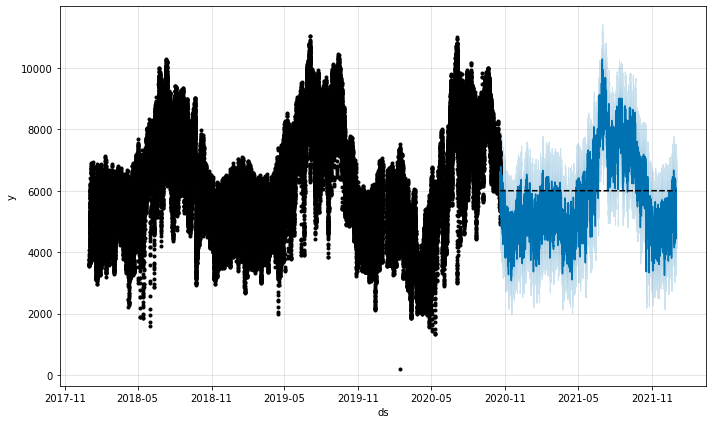

In [81]:
saved_mv_model.plot(test_forecast)

In [82]:
import matplotlib.pyplot as plt
%matplotlib inline

## Plot Actual Test Values

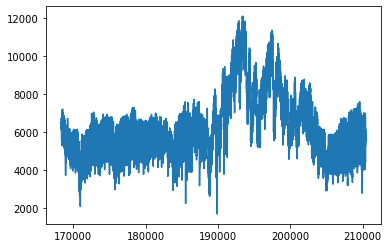

In [83]:
plt.plot(df_test['y'])
# plt.ylim([0, 12000])

## Plotting test forecast with actual test values

In [84]:
df_test

,ds,y,temp,dew,humidity,cloudcover,windspeed,winddir,visibility,cap
168354,2020-10-19 16:45:00,6699.14,32.0,10.0,25.82,0.0,14.8,300.0,4.0,6000
168355,2020-10-19 17:00:00,6749.01,30.9,13.2,33.88,0.0,7.4,303.0,3.1,6000
168356,2020-10-19 17:15:00,6409.50,30.9,13.2,33.88,0.0,7.4,303.0,3.1,6000
168357,2020-10-19 17:30:00,6576.38,30.9,13.2,33.88,0.0,7.4,303.0,3.1,6000
168358,2020-10-19 17:45:00,6282.79,30.9,13.2,33.88,0.0,7.4,303.0,3.1,6000
...,...,...,...,...,...,...,...,...,...,...
210426,2021-12-31 22:45:00,4712.55,10.0,8.0,87.38,27.4,0.0,0.0,2.0,6000
210427,2021-12-31 23:00:00,4649.58,9.2,7.3,88.04,28.5,0.0,0.0,1.3,6000
210428,2021-12-31 23:15:00,4571.39,9.2,7.3,88.04,28.5,0.0,0.0,1.3,6000
210429,2021-12-31 23:30:00,4510.39,9.2,7.3,88.04,28.5,0.0,0.0,1.3,6000


In [85]:
test_forecast.reset_index(inplace=True)

In [86]:
df_test.reset_index(inplace=True)

In [87]:
df_test

,index,ds,y,temp,dew,humidity,cloudcover,windspeed,winddir,visibility,cap
0,168354,2020-10-19 16:45:00,6699.14,32.0,10.0,25.82,0.0,14.8,300.0,4.0,6000
1,168355,2020-10-19 17:00:00,6749.01,30.9,13.2,33.88,0.0,7.4,303.0,3.1,6000
2,168356,2020-10-19 17:15:00,6409.50,30.9,13.2,33.88,0.0,7.4,303.0,3.1,6000
3,168357,2020-10-19 17:30:00,6576.38,30.9,13.2,33.88,0.0,7.4,303.0,3.1,6000
4,168358,2020-10-19 17:45:00,6282.79,30.9,13.2,33.88,0.0,7.4,303.0,3.1,6000
...,...,...,...,...,...,...,...,...,...,...,...
42072,210426,2021-12-31 22:45:00,4712.55,10.0,8.0,87.38,27.4,0.0,0.0,2.0,6000
42073,210427,2021-12-31 23:00:00,4649.58,9.2,7.3,88.04,28.5,0.0,0.0,1.3,6000
42074,210428,2021-12-31 23:15:00,4571.39,9.2,7.3,88.04,28.5,0.0,0.0,1.3,6000
42075,210429,2021-12-31 23:30:00,4510.39,9.2,7.3,88.04,28.5,0.0,0.0,1.3,6000


In [88]:
test_forecast

,index,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,...,windspeed,windspeed_lower,windspeed_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,0,2020-10-19 16:45:00,5999.771291,6000,4676.509686,6874.043964,5999.771291,5999.771291,-158.547658,-158.547658,...,-57.405638,-57.405638,-57.405638,-459.593351,-459.593351,-459.593351,0.0,0.0,0.0,5841.223633
1,1,2020-10-19 17:00:00,5999.771307,6000,4960.109750,7112.853230,5999.771307,5999.771307,52.103511,52.103511,...,6.099678,6.099678,6.099678,-460.107132,-460.107132,-460.107132,0.0,0.0,0.0,6051.874818
2,2,2020-10-19 17:15:00,5999.771323,6000,5088.186353,7342.546201,5999.771323,5999.771323,124.800046,124.800046,...,6.099678,6.099678,6.099678,-460.621321,-460.621321,-460.621321,0.0,0.0,0.0,6124.571370
3,3,2020-10-19 17:30:00,5999.771339,6000,5080.446578,7266.870547,5999.771339,5999.771339,207.924824,207.924824,...,6.099678,6.099678,6.099678,-461.135918,-461.135918,-461.135918,0.0,0.0,0.0,6207.696163
4,4,2020-10-19 17:45:00,5999.771355,6000,5235.586343,7444.618638,5999.771355,5999.771355,299.201044,299.201044,...,6.099678,6.099678,6.099678,-461.650923,-461.650923,-461.650923,0.0,0.0,0.0,6298.972399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42072,42072,2021-12-31 22:45:00,5999.988095,6000,4190.394370,6288.676150,5999.987420,5999.988692,-721.907446,-721.907446,...,69.604994,69.604994,69.604994,341.414146,341.414146,341.414146,0.0,0.0,0.0,5278.080649
42073,42073,2021-12-31 23:00:00,5999.988096,6000,4274.034652,6420.708158,5999.987421,5999.988692,-710.298518,-710.298518,...,69.604994,69.604994,69.604994,341.331212,341.331212,341.331212,0.0,0.0,0.0,5289.689578
42074,42074,2021-12-31 23:15:00,5999.988096,6000,4191.221217,6354.986880,5999.987421,5999.988693,-741.040682,-741.040682,...,69.604994,69.604994,69.604994,341.247533,341.247533,341.247533,0.0,0.0,0.0,5258.947415
42075,42075,2021-12-31 23:30:00,5999.988097,6000,4113.625633,6320.412195,5999.987422,5999.988694,-768.254245,-768.254245,...,69.604994,69.604994,69.604994,341.163108,341.163108,341.163108,0.0,0.0,0.0,5231.733852


In [89]:
df_test.drop(columns='index')

,ds,y,temp,dew,humidity,cloudcover,windspeed,winddir,visibility,cap
0,2020-10-19 16:45:00,6699.14,32.0,10.0,25.82,0.0,14.8,300.0,4.0,6000
1,2020-10-19 17:00:00,6749.01,30.9,13.2,33.88,0.0,7.4,303.0,3.1,6000
2,2020-10-19 17:15:00,6409.50,30.9,13.2,33.88,0.0,7.4,303.0,3.1,6000
3,2020-10-19 17:30:00,6576.38,30.9,13.2,33.88,0.0,7.4,303.0,3.1,6000
4,2020-10-19 17:45:00,6282.79,30.9,13.2,33.88,0.0,7.4,303.0,3.1,6000
...,...,...,...,...,...,...,...,...,...,...
42072,2021-12-31 22:45:00,4712.55,10.0,8.0,87.38,27.4,0.0,0.0,2.0,6000
42073,2021-12-31 23:00:00,4649.58,9.2,7.3,88.04,28.5,0.0,0.0,1.3,6000
42074,2021-12-31 23:15:00,4571.39,9.2,7.3,88.04,28.5,0.0,0.0,1.3,6000
42075,2021-12-31 23:30:00,4510.39,9.2,7.3,88.04,28.5,0.0,0.0,1.3,6000


In [90]:
test_forecast

,index,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,...,windspeed,windspeed_lower,windspeed_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,0,2020-10-19 16:45:00,5999.771291,6000,4676.509686,6874.043964,5999.771291,5999.771291,-158.547658,-158.547658,...,-57.405638,-57.405638,-57.405638,-459.593351,-459.593351,-459.593351,0.0,0.0,0.0,5841.223633
1,1,2020-10-19 17:00:00,5999.771307,6000,4960.109750,7112.853230,5999.771307,5999.771307,52.103511,52.103511,...,6.099678,6.099678,6.099678,-460.107132,-460.107132,-460.107132,0.0,0.0,0.0,6051.874818
2,2,2020-10-19 17:15:00,5999.771323,6000,5088.186353,7342.546201,5999.771323,5999.771323,124.800046,124.800046,...,6.099678,6.099678,6.099678,-460.621321,-460.621321,-460.621321,0.0,0.0,0.0,6124.571370
3,3,2020-10-19 17:30:00,5999.771339,6000,5080.446578,7266.870547,5999.771339,5999.771339,207.924824,207.924824,...,6.099678,6.099678,6.099678,-461.135918,-461.135918,-461.135918,0.0,0.0,0.0,6207.696163
4,4,2020-10-19 17:45:00,5999.771355,6000,5235.586343,7444.618638,5999.771355,5999.771355,299.201044,299.201044,...,6.099678,6.099678,6.099678,-461.650923,-461.650923,-461.650923,0.0,0.0,0.0,6298.972399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42072,42072,2021-12-31 22:45:00,5999.988095,6000,4190.394370,6288.676150,5999.987420,5999.988692,-721.907446,-721.907446,...,69.604994,69.604994,69.604994,341.414146,341.414146,341.414146,0.0,0.0,0.0,5278.080649
42073,42073,2021-12-31 23:00:00,5999.988096,6000,4274.034652,6420.708158,5999.987421,5999.988692,-710.298518,-710.298518,...,69.604994,69.604994,69.604994,341.331212,341.331212,341.331212,0.0,0.0,0.0,5289.689578
42074,42074,2021-12-31 23:15:00,5999.988096,6000,4191.221217,6354.986880,5999.987421,5999.988693,-741.040682,-741.040682,...,69.604994,69.604994,69.604994,341.247533,341.247533,341.247533,0.0,0.0,0.0,5258.947415
42075,42075,2021-12-31 23:30:00,5999.988097,6000,4113.625633,6320.412195,5999.987422,5999.988694,-768.254245,-768.254245,...,69.604994,69.604994,69.604994,341.163108,341.163108,341.163108,0.0,0.0,0.0,5231.733852


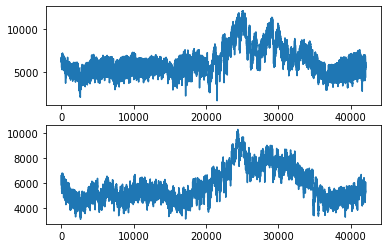

In [91]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(df_test['y'])
ax[1].plot(test_forecast['yhat'])

<function matplotlib.pyplot.show(close=None, block=None)>

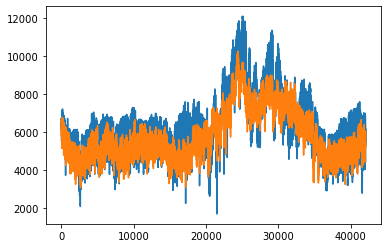

In [92]:
plt.plot(df_test['y'])
plt.plot(test_forecast['yhat'])
plt.show

## Alignment Check

## Don't run alignment cells for now

In [49]:
# test_forecast.drop(test_forecast[test_forecast['ds'] == '2021-05-23 20:30:00'].index, inplace=True)

In [50]:
# test_forecast.drop(test_forecast[test_forecast['ds'] == '2021-05-23 20:45:00'].index, inplace=True)

In [51]:
# test_forecast.sort_index(inplace=True)

In [52]:
# df_test.sort_index(inplace=True)

In [53]:
# df_test.drop(columns='index', inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [54]:
# test_forecast.drop(columns='index', inplace=True)

In [55]:
# test_forecast['ds'].shape == df_test['ds'].shape

True

In [56]:
# test_forecast['ds'].dtype #== df_test['ds'].dtype

dtype('<M8[ns]')

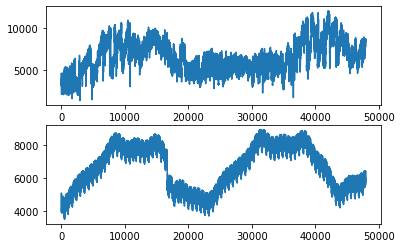

In [57]:
# fig, ax = plt.subplots(2, 1)
# ax[0].plot(df_test['y'])
# ax[1].plot(test_forecast['yhat'])

In [58]:
# test_forecast['ds'][0] 

Timestamp('2020-03-09 00:00:00')

In [59]:
# df_test['ds'][0]

'2020-03-09 14:45:00'

In [65]:
# test_forecast = test_forecast.loc[test_forecast.ds >= '2020-03-09 14:45:00']

In [67]:
# test_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1,2020-03-09 14:45:00,5900.296544,3171.916007,5481.531455,5900.296544,5900.296544,-1570.946404,-1570.946404,-1570.946404,-61.846437,...,-109.914857,-109.914857,-109.914857,-1399.185110,-1399.185110,-1399.185110,0.0,0.0,0.0,4329.350140
2,2020-03-09 15:00:00,5900.302799,3077.165376,5498.388928,5900.302799,5900.302799,-1623.693847,-1623.693847,-1623.693847,-119.318514,...,-105.157344,-105.157344,-105.157344,-1399.217989,-1399.217989,-1399.217989,0.0,0.0,0.0,4276.608952
3,2020-03-09 15:15:00,5900.309054,3066.869840,5327.756634,5900.309054,5900.309054,-1669.584775,-1669.584775,-1669.584775,-169.916058,...,-100.417891,-100.417891,-100.417891,-1399.250826,-1399.250826,-1399.250826,0.0,0.0,0.0,4230.724280
4,2020-03-09 15:30:00,5900.315309,3079.373219,5423.713692,5900.315309,5900.315309,-1705.636293,-1705.636293,-1705.636293,-210.654249,...,-95.698424,-95.698424,-95.698424,-1399.283620,-1399.283620,-1399.283620,0.0,0.0,0.0,4194.679017
5,2020-03-09 15:45:00,5900.321564,3004.327760,5337.678558,5900.321564,5900.321564,-1729.323872,-1729.323872,-1729.323872,-239.006654,...,-91.000844,-91.000844,-91.000844,-1399.316374,-1399.316374,-1399.316374,0.0,0.0,0.0,4170.997693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47940,2021-12-31 22:45:00,6298.023692,2654.680851,8900.592688,3384.662319,8921.753386,-329.310619,-329.310619,-329.310619,129.036825,...,112.260161,112.260161,112.260161,-570.607605,-570.607605,-570.607605,0.0,0.0,0.0,5968.713073
47941,2021-12-31 23:00:00,6298.029948,2590.503862,8722.852109,3384.626040,8921.964441,-391.839718,-391.839718,-391.839718,66.243844,...,112.498764,112.498764,112.498764,-570.582325,-570.582325,-570.582325,0.0,0.0,0.0,5906.190230
47942,2021-12-31 23:15:00,6298.036203,2517.721908,8791.146777,3384.589761,8922.175495,-451.199784,-451.199784,-451.199784,6.650845,...,112.706962,112.706962,112.706962,-570.557591,-570.557591,-570.557591,0.0,0.0,0.0,5846.836418
47943,2021-12-31 23:30:00,6298.042458,2315.394237,8732.876186,3384.553482,8922.386549,-506.743298,-506.743298,-506.743298,-49.093332,...,112.883437,112.883437,112.883437,-570.533404,-570.533404,-570.533404,0.0,0.0,0.0,5791.299160


In [68]:
# df_test.iloc[:test_forecast.shape[0]]

,ds,y,temp,dew,humidity,cloudcover,windspeed,winddir
0,2020-03-09 14:45:00,3894.86,24.9,11.6,43.40,0.0,20.2,283
1,2020-03-09 15:00:00,3851.25,24.1,10.1,41.18,0.0,20.5,280
2,2020-03-09 15:15:00,3465.93,24.1,10.1,41.18,0.0,20.5,280
3,2020-03-09 15:30:00,3306.17,24.1,10.1,41.18,0.0,20.5,280
4,2020-03-09 15:45:00,3258.34,24.1,10.1,41.18,0.0,20.5,280
...,...,...,...,...,...,...,...,...
47937,2021-09-09 22:45:00,8625.34,29.0,27.0,88.99,89.0,9.4,100
47938,2021-09-09 23:00:00,8537.11,29.0,26.8,87.64,70.3,7.8,82
47939,2021-09-09 23:15:00,8554.19,29.0,26.8,87.64,70.3,7.8,82
47940,2021-09-09 23:30:00,8536.29,29.0,26.8,87.64,70.3,7.8,82


In [93]:
# fig, ax = plt.subplots(2, 1)
# ax[0].plot(df_test['y'])
# ax[1].plot(test_forecast['yhat'])

## Alignment Done

## Getting RMSE error

In [94]:
from sklearn.metrics import mean_squared_error
import numpy as np

rms = np.sqrt(mean_squared_error(df_test['y'], test_forecast['yhat']))

In [95]:
rms

1000.8013454365347

In [96]:
df_test['ds'][:-1]

0       2020-10-19 16:45:00
1       2020-10-19 17:00:00
2       2020-10-19 17:15:00
3       2020-10-19 17:30:00
4       2020-10-19 17:45:00
                ...        
42071   2021-12-31 22:30:00
42072   2021-12-31 22:45:00
42073   2021-12-31 23:00:00
42074   2021-12-31 23:15:00
42075   2021-12-31 23:30:00
Name: ds, Length: 42076, dtype: datetime64[ns]

In [97]:
test_forecast['ds']

0       2020-10-19 16:45:00
1       2020-10-19 17:00:00
2       2020-10-19 17:15:00
3       2020-10-19 17:30:00
4       2020-10-19 17:45:00
                ...        
42072   2021-12-31 22:45:00
42073   2021-12-31 23:00:00
42074   2021-12-31 23:15:00
42075   2021-12-31 23:30:00
42076   2021-12-31 23:45:00
Name: ds, Length: 42077, dtype: datetime64[ns]

In [98]:
# df_test['ds'] = pd.to_datetime(df_test['ds'])

In [99]:
# df_test

In [100]:
df_test['y'].mean()

6115.153494783383

In [101]:
mx = df_test['y'].max()
mn = df_test['y'].min()

In [102]:
nrmse = rms/(mx - mn)

In [103]:
nrmse

0.09614058191838384

## Create future Dataframes

In [104]:
future = saved_mv_model.make_future_dataframe(periods=5*96, freq='H')

In [105]:
future.head()

,ds
0,2018-01-01 00:00:00
1,2018-01-01 00:15:00
2,2018-01-01 00:30:00
3,2018-01-01 00:45:00
4,2018-01-01 01:00:00


## Make future forecast

In [97]:
forecast = saved_mv_model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
134822,2020-12-19 19:45:00,5767.066880,4520.098270,6990.705614
134823,2020-12-19 20:45:00,5791.977770,4638.550668,6997.430183
134824,2020-12-19 21:45:00,5607.835671,4354.073637,6877.913808
134825,2020-12-19 22:45:00,5323.499314,4141.306254,6635.186989
134826,2020-12-19 23:45:00,5055.218766,3769.207684,6302.589164


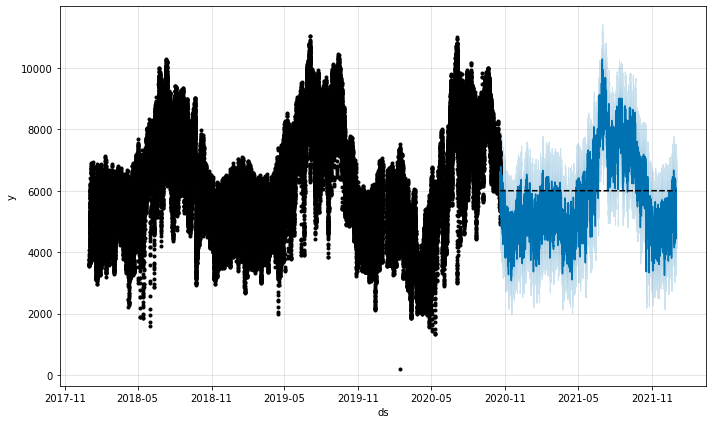

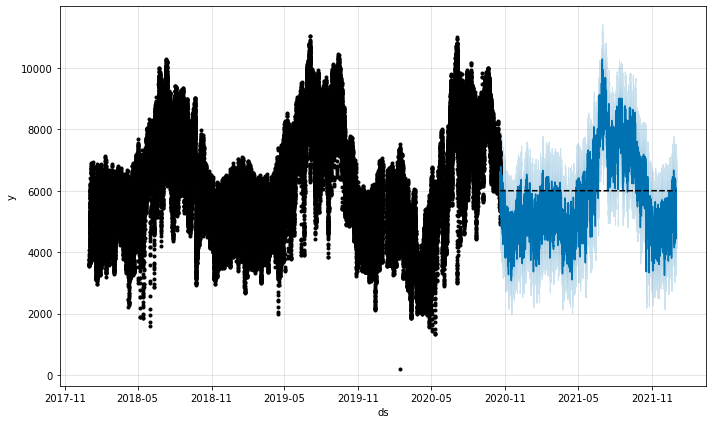

In [106]:
saved_mv_model.plot(forecast)